# Notebook on Stable Diffusion Model

This notebook provides an in-depth exploration of the Stable Diffusion model and its practical applications. Developed by experts from CompVis, Stability AI, and LAION, the Stable Diffusion model is a latent diffusion model trained on 512x512 images from a subset of the LAION-5B database.

Before delving into the theoretical aspects of how Stable Diffusion functions, this section demonstrates how to perform text-to-image, image-to-image, and image-inpainting inference in just a few lines of code.

## Prerequisites:

Ensure you are using a GPU runtime for faster inference (use the 'nvidia-smi' command to check GPU availability).

Install necessary libraries, including 'diffusers,' 'scipy,' 'ftfy,' 'transformers,' and 'accelerate' for accelerated loading (use 'pip install [library]' command).

In [1]:
%load_ext autoreload
%autoreload 2
import os
if 0:
    os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"
    os.environ["CUDA_VISIBLE_DEVICES"]="1"

In [2]:
import sys
sys.path.insert(0, "diffusers/src")
sys.path.insert(1, "transformers/src")

In [4]:
import PIL
from PIL import Image
import matplotlib.pyplot as plt
import diffusers
import transformers
from performance_estimator_wrapper_copy import PerformanceEstimator

import torch
import os

import requests
from PIL import Image
from io import BytesIO

# from diffusers import DiffusionPipeline, StableDiffusionImg2ImgPipeline, StableDiffusionInpaintPipeline

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Device Type (cpu|cuda:{0,1,2,3}): ', device)

Device Type (cpu|cuda:{0,1,2,3}):  cuda


The 'DiffusionPipeline' is an end-to-end inference pipeline that facilitates loading the model.

Explore other model variants by specifying different versions, such as "CompVis/stable-diffusion-v1-4" or "stabilityai/stable-diffusion-2-1-base."

In [ ]:
# # Load the pre-trained weights of all components of the model (Stable Diffusion version 1.5 in this case)

pipe = DiffusionPipeline.from_pretrained("runwayml/stable-diffusion-v1-5").to(device)
# pipe.save_pretrained("stable-diffusion-v1-5new")

************* diffusers StableDiffusionPipeline
pipeline_cls <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'>
************* diffusers StableDiffusionPipeline
pipeline_cls <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'>


Loading pipeline components...:  57%|█████▋    | 4/7 [00:00<00:00,  6.81it/s]`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.
Loading pipeline components...: 100%|██████████| 7/7 [00:00<00:00,  7.05it/s]


dict {'feature_extractor': CLIPImageProcessor {
  "crop_size": {
    "height": 224,
    "width": 224
  },
  "do_center_crop": true,
  "do_convert_rgb": true,
  "do_normalize": true,
  "do_rescale": true,
  "do_resize": true,
  "feature_extractor_type": "CLIPFeatureExtractor",
  "image_mean": [
    0.48145466,
    0.4578275,
    0.40821073
  ],
  "image_processor_type": "CLIPImageProcessor",
  "image_std": [
    0.26862954,
    0.26130258,
    0.27577711
  ],
  "resample": 3,
  "rescale_factor": 0.00392156862745098,
  "size": {
    "shortest_edge": 224
  }
}
, 'unet': UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
    

In [ ]:
pipe.vae_scale_factor, pipe.unet.config.sample_size

(8, 64)

Generate images based on a provided prompt:

text input ids tensor([[49406, 16232,   530,   320,  4055,  2756,   593, 39809, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407,
         49407, 49407, 49407, 49407, 49407, 49407, 49407]]) torch.Size([1, 77]) <|startoftext|>butterflies in a flower garden with sunflowers <|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|endoftext|><|en

100%|██████████| 50/50 [00:06<00:00,  7.44it/s]


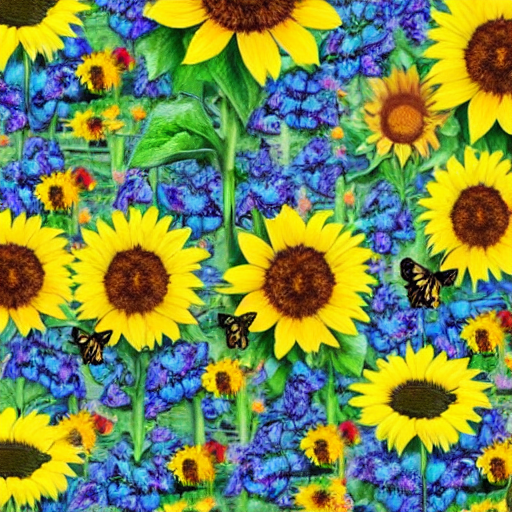

In [ ]:
pipe("Butterflies in a flower garden with sunflowers").images[0]

To visualize the impact of noise levels, the following code snippet showcases images at each noise level:

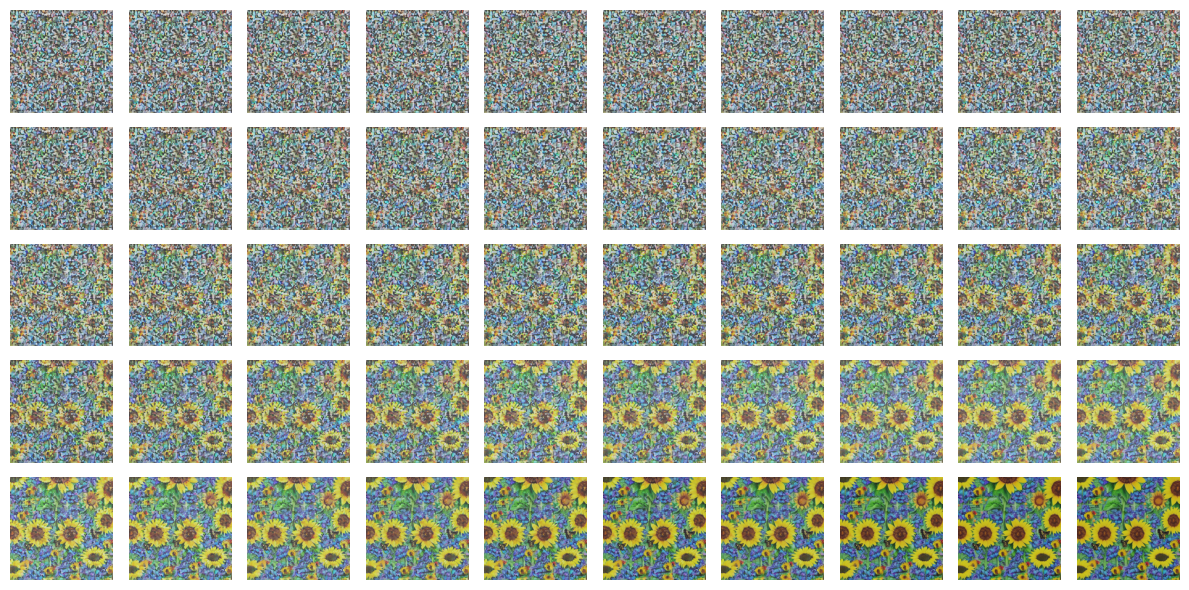

In [ ]:
fig, axs = plt.subplots(5, 10, figsize=(12, 6))  # Change the dimensions as needed

for i in range(1, 51):  # Display 50 images
    image = pipe.vae.decode(pipe.inter_latents[i] / pipe.vae.config.scaling_factor, return_dict=False)[0]
    image_np = image.permute(0, 2, 3, 1).squeeze(0).cpu().detach().numpy()
    
    # Normalize the image data to the range [0, 1]
    image_np = (image_np - image_np.min()) / (image_np.max() - image_np.min())
    
    # Calculate subplot position
    row = (i - 1) // 10
    col = (i - 1) % 10

    # Display the image in the appropriate subplot
    axs[row, col].imshow(image_np)
    axs[row, col].axis('off')  # Turn off axis labels

# Ensure proper layout
plt.tight_layout()
plt.show()

In [ ]:
image.shape

torch.Size([1, 3, 512, 512])

Stable Diffusion comprises three main components:

Autoencoder (VAE):

    1. The VAE model consists of an encoder and a decoder.
    2. The encoder converts the image into a low-dimensional latent representation.
    3. The decoder transforms the latent representation back into an image.

U-Net:

    1. The U-Net consists of an encoder and a decoder with ResNet blocks.
    2. The encoder compresses an image representation into a lower resolution.
    3. The decoder decodes the lower resolution back to the original higher resolution, predicting noise residuals for denoising.

Text-encoder:

    1. Responsible for transforming input prompts (e.g., "An astronaut riding a horse") into an embedding space understandable by the U-Net.
    2. Usually a transformer-based encoder mapping input tokens to latent text embeddings.

In [ ]:
pipe

StableDiffusionPipeline {
  "_class_name": "StableDiffusionPipeline",
  "_diffusers_version": "0.21.0.dev0",
  "_name_or_path": "runwayml/stable-diffusion-v1-5",
  "feature_extractor": [
    "transformers",
    "CLIPImageProcessor"
  ],
  "requires_safety_checker": true,
  "safety_checker": [
    "stable_diffusion",
    "StableDiffusionSafetyChecker"
  ],
  "scheduler": [
    "diffusers",
    "PNDMScheduler"
  ],
  "text_encoder": [
    "transformers",
    "CLIPTextModel"
  ],
  "tokenizer": [
    "transformers",
    "CLIPTokenizer"
  ],
  "unet": [
    "diffusers",
    "UNet2DConditionModel"
  ],
  "vae": [
    "diffusers",
    "AutoencoderKL"
  ]
}

## Check each component's content:

In [ ]:
# # Import a different library to check a model summary for each component of the Stable Diffusion model
from helper_utils import *

Within the Autoencoder (VAE) module, essential components play a pivotal role. The architecture boasts a ResNet block backbone and LoRA-compatible convolution layers, strategically utilized for weight updates during fine-tuning to align with user datasets. Comprising both an encoder and a decoder, this module encompasses approximately 83 million parameters.

In [ ]:
model_summary(pipe.components['vae'])

{'AutoencoderKL': 1,
 'Encoder': 1,
 'Conv2d': 6,
 'ModuleList': 22,
 'DownEncoderBlock2D': 4,
 'ResnetBlock2D': 24,
 'GroupNorm': 52,
 'LoRACompatibleConv': 58,
 'Dropout': 26,
 'SiLU': 26,
 'Downsample2D': 3,
 'UNetMidBlock2D': 2,
 'Attention': 2,
 'LoRACompatibleLinear': 8,
 'Decoder': 1,
 'UpDecoderBlock2D': 4,
 'Upsample2D': 3,
 'Parameters': '83.653863M'}

The Text-encoder employed in this model is the CLIPEncoder, featuring a transformer component. This element incorporates Linear layers, layer norms, and a variant of GELU activation. The Text-encoder boasts around 123 million parameters.

In [ ]:
model_summary(pipe.components['text_encoder'])

{'CLIPTextModel': 1,
 'CLIPTextTransformer': 1,
 'CLIPTextEmbeddings': 1,
 'Embedding': 2,
 'CLIPEncoder': 1,
 'ModuleList': 1,
 'CLIPEncoderLayer': 12,
 'CLIPAttention': 12,
 'Linear': 72,
 'LayerNorm': 25,
 'CLIPMLP': 12,
 'QuickGELUActivation': 12,
 'Parameters': '123.06048M'}

In [ ]:
pipe.text_encoder

CLIPTextModel(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 768)
      (position_embedding): Embedding(77, 768)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPAttention(
            (k_proj): Linear(in_features=768, out_features=768, bias=True)
            (v_proj): Linear(in_features=768, out_features=768, bias=True)
            (q_proj): Linear(in_features=768, out_features=768, bias=True)
            (out_proj): Linear(in_features=768, out_features=768, bias=True)
          )
          (layer_norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=768, out_features=3072, bias=True)
            (fc2): Linear(in_features=3072, out_features=768, bias=True)
          )
          (layer_norm2): LayerNorm((768,), eps=1e

The U-Net model stands as a crucial component employed for diffusion purposes, orchestrating noise addition, learning noise, and noise removal through iterations. Remarkably, this component hosts the highest number of parameters, nearing 859 million.

In [ ]:
model_summary(pipe.components['unet'])

{'UNet2DConditionModel': 1,
 'Conv2d': 2,
 'Timesteps': 1,
 'TimestepEmbedding': 1,
 'Linear': 2,
 'SiLU': 24,
 'ModuleList': 88,
 'CrossAttnDownBlock2D': 3,
 'Transformer2DModel': 16,
 'GroupNorm': 61,
 'LoRACompatibleConv': 96,
 'BasicTransformerBlock': 16,
 'LayerNorm': 48,
 'Attention': 32,
 'LoRACompatibleLinear': 182,
 'Dropout': 70,
 'FeedForward': 16,
 'GEGLU': 16,
 'ResnetBlock2D': 22,
 'Downsample2D': 3,
 'DownBlock2D': 1,
 'UpBlock2D': 1,
 'Upsample2D': 3,
 'CrossAttnUpBlock2D': 3,
 'UNetMidBlock2DCrossAttn': 1,
 'Parameters': '859.520964M'}

In [ ]:
pipe.unet

UNet2DConditionModel(
  (conv_in): Conv2d(4, 320, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (time_proj): Timesteps()
  (time_embedding): TimestepEmbedding(
    (linear_1): Linear(in_features=320, out_features=1280, bias=True)
    (act): SiLU()
    (linear_2): Linear(in_features=1280, out_features=1280, bias=True)
  )
  (down_blocks): ModuleList(
    (0): CrossAttnDownBlock2D(
      (attentions): ModuleList(
        (0-1): 2 x Transformer2DModel(
          (norm): GroupNorm(32, 320, eps=1e-06, affine=True)
          (proj_in): LoRACompatibleConv(320, 320, kernel_size=(1, 1), stride=(1, 1))
          (transformer_blocks): ModuleList(
            (0): BasicTransformerBlock(
              (norm1): LayerNorm((320,), eps=1e-05, elementwise_affine=True)
              (attn1): Attention(
                (to_q): LoRACompatibleLinear(in_features=320, out_features=320, bias=False)
                (to_k): LoRACompatibleLinear(in_features=320, out_features=320, bias=False)
              

# Code Segment for Image-to-Image Generation

The following code snippet demonstrates the process for image generation using the Stable Diffusion model. You can find these codes at the official Hugging Face Stable Diffusion V1.5 repository.

In [ ]:
im = Image.open('images/sketch-mountains-input.jpg')
im

In this scenario, you provide an input image, and through the application of prompts, you can customize the image by adding supplementary details. Additionally, you have the flexibility to specify parameters such as image width, height, denoise strength, etc., to tailor the image generation process to your requirements.

Similarly to the text-to-image code snippets mentioned above, we use the *StableDiffusionImg2ImgPipeline* to seamlessly load the Stable Diffusion V1.5 model.

In [ ]:
width = 512
height = 512
Denoise_strength = 0.75
CFG_scale = 7.5
batch_size = 3

# load the pipeline
device = "cuda"
pipe = StableDiffusionImg2ImgPipeline.from_pretrained("runwayml/stable-diffusion-v1-5", torch_dtype=torch.float16).to(
    device
)

# let's download an initial image
im = Image.open('images/sketch-mountains-input.jpg') 
im.thumbnail((width, height))

prompt = ["A fantasy landscape, trending on artstation"] * batch_size
# prompt = "trees"

images = pipe(prompt=prompt, image=im, strength=Denoise_strength, guidance_scale=CFG_scale).images

grid = image_grid(images, rows=1, cols=3)

In [ ]:
grid

# Image-Inpainting

Furthermore, another application of the Stable Diffusion model is image inpainting. To facilitate this, we utilize the *StableDiffusionInpaintPipeline* pipeline to load the model.

In [ ]:

init_image = Image.open('images/dog.png').resize((width, height))
mask_image = Image.open('images/dog_mask.png').resize((width, height))

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting",
    torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

prompt = ["Face of a yellow cat, high resolution, sitting on a park bench"] * batch_size
image = pipe(prompt=prompt, image=init_image, mask_image=mask_image).images

grid = image_grid(image, rows=1, cols=3)

In [ ]:
init_image

In [ ]:
mask_image

In [ ]:
grid

This notebook segment strives to exemplify the practical implementation of Stable Diffusion for Text-to-Image, Image-to-image generation and Inpainting, providing users with a versatile tool for creative modifications and enhancements.